# (FORD-GO-BIKE dataset)
## by (Tariq Alhajri)

## Investigation Overview

> This dataset is about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, helps to motivate people to use bikes more often, in this project we investigate the dataset to see any relationship between age, gender, and user-type and the effect it has on trip duratiom

## Dataset Overview

> This data set consist of 12 columns and 183411 rows.
>- Age represent the age of the record, which is calculated by 2019-(member_birth_year).
>- Age-class categorize each record by its age: [child:0-16 ,, young-adult:17-30 ,, middle-aged adults:31-45 ,, old-aged:+45] 
>- Gender represent the gender, Male,Female and Other.
>- duration-sec represnt the trip duration in seconds.
>- user_type categorize members to Subscribers and Customers.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('fordgobike-cleaned.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> 89% of members are Subscribers and only 11% are Customers.

Text(0.5, 1.0, 'ditribution of users by user type')

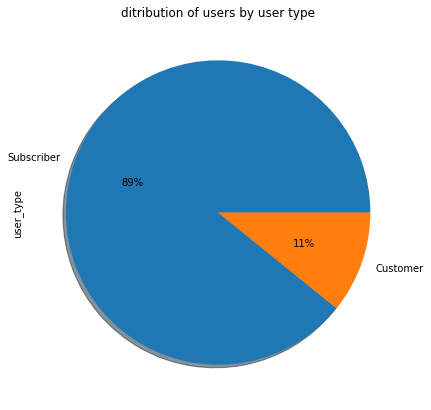

In [6]:
plot = df.user_type.value_counts().plot.pie(figsize=(7, 7),autopct='%.f%%', shadow=True);
plot.set_title('ditribution of users by user type')

## (Visualization 2)

> There is not a single record that has age less than 17 which is odd considering that they represent 14% of San Francisco population
> Middle-aged adults is the highest category the Male has, whereas young-adults is the highest in Female gender.

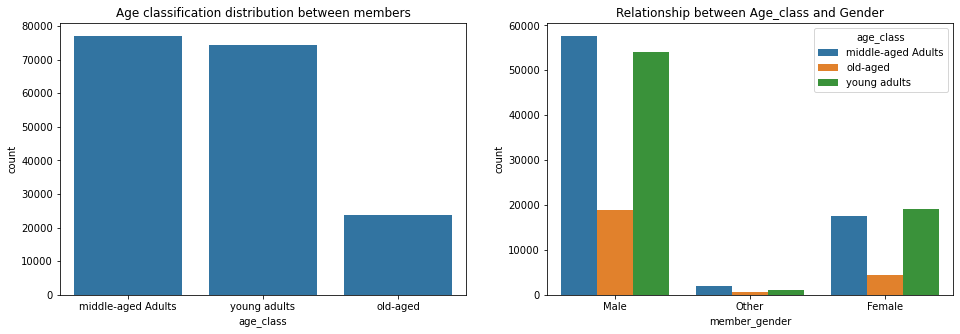

In [9]:
plt.figure(figsize = [16, 5]);

plt.subplot(1,2,1)
#plotting a bar chart to see the age_class distribtion in this dataset using seaborn countplot method.
sb.countplot(data=df, x='age_class',order= df.age_class.value_counts().index,color = sb.color_palette()[0]).set_title(
    'Age classification distribution between members');

#plotting the second plot.
plt.subplot(1,2,2);

#plotting a box plot for the relationship between age and gender. 
sb.countplot(data= df, x='member_gender',hue='age_class',).set_title('Relationship between Age_class and Gender');

In [10]:
df_noextreme= df.query('age <81 and duration_sec < 30000')

## (Visualization 3)

> Younger people tend to have longer trip duration in comparison to older people.

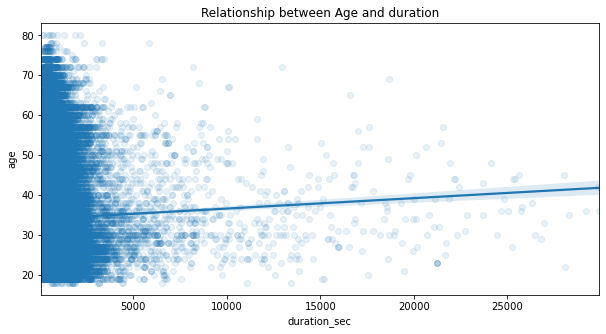

In [13]:
plt.figure(figsize=[10,5])
sb.regplot(data=df_noextreme,y='age',x='duration_sec',scatter_kws={'alpha':1/10}).set_title('Relationship between Age and duration');

In [15]:
#source: https://til.tafkas.net/posts/seaborn-correlation-coefficient-on-facetgrid/

from scipy import stats
#method to print the correlation coefficient in each scatter plot.
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

## (Visualization 4)

> There is slight positive relationship between age and duration in regarding the Male gender.

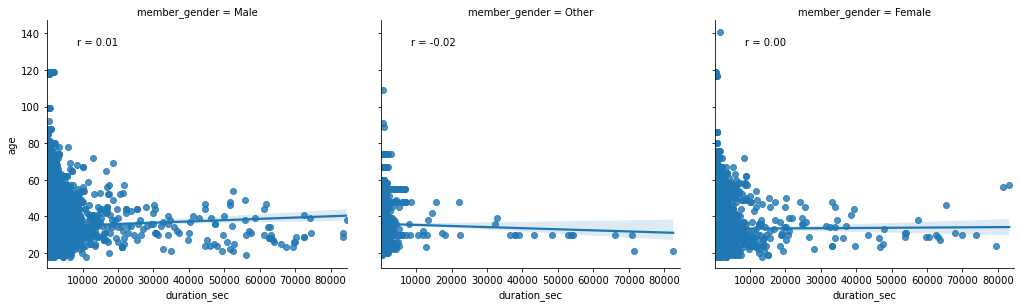

In [16]:
g= sb.FacetGrid(data=df,col='member_gender');
g.map(sb.regplot,'duration_sec','age');
g.map(corrfunc, 'duration_sec', 'age');
g.fig.set_size_inches(15,5);

## (Visualization 5)

> The gender distribution between members is 75% percent of them are male, and only 23% are female, three times more than females, it is very odd especially because according to The U.S. Census Bureau, the percentage of female in San Francisco is 49% whereas male are 51% which nowhere close to what this dataset says.

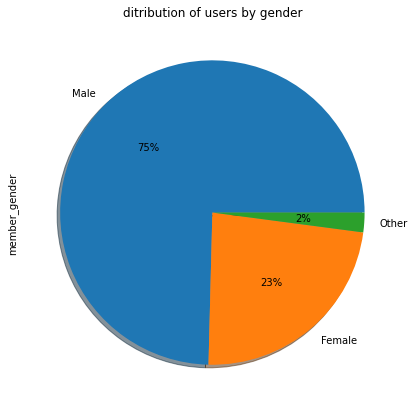

In [18]:
plot = df.member_gender.value_counts().plot.pie(figsize=(7, 7),autopct='%.f%%', shadow=True);
plot.set_title('ditribution of users by gender');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!